## Implement Looping Graph

In [19]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
import random

In [20]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [21]:
def greet_user(state: AgentState) -> AgentState:
    """Greeting node that says Hi to the person"""
    state['name'] = f"Hey there, {state['name']}"
    state['counter'] = 0
    return state


def generate_random(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state['number'].append(random.randint(-10, 10))
    state['counter'] += 1
    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide whether to continue or end"""
    if state['counter'] < 5:
        print("Entering Loop ", state['counter'])
        return "loop"
    else:
        return "end"

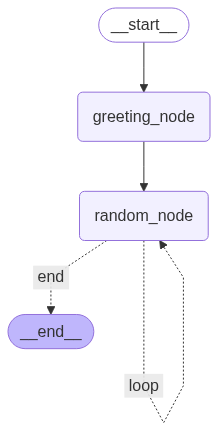

In [22]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greet_user)
graph.add_node("random_node", generate_random)
graph.add_edge("greeting_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop": "random_node",
        "end": END
    }
)

graph.set_entry_point("greeting_node")

app = graph.compile()

app


In [23]:
result = app.invoke({"name": "Dhanesh", "number": [], "counter": 2})

result

Entering Loop  1
Entering Loop  2
Entering Loop  3
Entering Loop  4


{'name': 'Hey there, Dhanesh', 'number': [1, 9, 8, 7, -3], 'counter': 5}